# The nth ugly number
Ugly numbers have prime factors of only 2, 3, and 5. We can do this by finding the prime factorization of each number and counting how many have 2, 3, 5 as their only prime factors. We can save on this by storing results for each of the prime factorizations.

To determine a numbers prime factorization we repeeatedly divide it with the smallest prime number that it is divisible by until it becomes 1. This means we also need to know which numbers are prime numbers. Prime numbers are those whose prime factorizations are 1 and themselves. 

In [41]:
import unittest
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [49]:
class Solution:
    def nthUglyNumber(self, n: int) -> int:
        count = 2
        number = 2
        numbers = [1]
        while count <= n:
            if self.is_ugly_number(number):
                count += 1
                numbers.append(number)
                number += 1
                
            else:
                number += 1
        return numbers[-1]
    
    def is_ugly_number(self, number):
        # check if a number is ugly
        factorset = self.prime_factorize(number)
        if self.isugly(factorset):
            return True
        else:
            return False
        
    
    def isugly(self, factorset):
        # check if a set of numbers is ugly
        uglyset = set([2, 3, 5])
        if factorset.issubset(uglyset):
            return True
        else:
            return False
    
    def prime_factorize(self, n, factor=None, factors=None):
        if factor:
            factors.append(factor)
        if factors == None:
            factors = []
        for i in range(2, n + 1):
            if n % i == 0:
                return set(self.prime_factorize(n // i, factor=i, factors=factors))
            else:
                continue
        return factors
        
        
        
        
        

In [34]:
s = Solution()
s.prime_factorize(144)

{2, 3}

In [35]:
# test ugly set logic
class TestUglySet(unittest.TestCase):
    
    def setUp(self):
        self.s = Solution()
        
    def test_full_set(self):
        full_set = set([2,3,5])
        self.assertTrue(self.s.isugly(full_set))
    
    def test_each_set(self):
        sets = [set([i]) for i in [2, 3, 5]]
        for st in sets:
            self.assertTrue(self.s.isugly(st))
            
    def test_not_set(self):
        not_set = set([7])
        self.assertFalse(self.s.isugly(not_set))
       

def suite():
    suite = unittest.TestSuite()
    suite.addTest(TestUglySet('test_full_set'))
    suite.addTest(TestUglySet('test_each_set'))
    suite.addTest(TestUglySet('test_not_set'))
    return suite
    
    
runner = unittest.TextTestRunner()
runner.run(suite())

...
----------------------------------------------------------------------
Ran 3 tests in 0.002s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

In [36]:
# test ugly number logic
class TestUglyNumber(unittest.TestCase):
    def setUp(self):
        self.s = Solution()
        
    def test_base_uglies(self):
        base_uglies = [2, 3, 5]
        for n in base_uglies:
            self.assertTrue(s.is_ugly_number(n))
            
    def test_not_ugly(self):
        not_ugly = 7
        self.assertFalse(s.is_ugly_number(not_ugly))
        
    def test_bigger_ugly(self):
        ugly = 27
        self.assertTrue(s.is_ugly_number(ugly))

        
            
def suite():
    suite = unittest.TestSuite()
    suite.addTest(TestUglyNumber('test_base_uglies'))
    suite.addTest(TestUglyNumber('test_not_ugly'))
    suite.addTest(TestUglyNumber('test_bigger_ugly'))

    return suite
    
    
runner = unittest.TextTestRunner()
runner.run(suite())

...
----------------------------------------------------------------------
Ran 3 tests in 0.002s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

In [37]:
s = Solution()
s.nthUglyNumber(20)

[1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 15, 16, 18, 20, 24, 25, 27, 30, 32, 36]


36

# Take 2
Above brute force by repeatedly dividing by a prime number is good, but we end up repeatedly solving the same problem, we can save the solution and access it later to accelerate the algorithm

In [ ]:
class Solution2:
    def nthUglyNumber(self, n: int) -> int:
        count = 2
        number = 2
        numbers = [1]
        #  initialize factor_dict outside of prime_factorize, this is where we will hold the previously calculated numbers
        self.factor_dict = {} 
        
        while count <= n:
            if self.is_ugly_number(number):
                count += 1
                numbers.append(number)
                number += 1
                
            else:
                number += 1
        return numbers[-1]
    
    def is_ugly_number(self, number):
        # check if a number is ugly
        factorset = self.prime_factorize(number)
        print(number, factorset)
        if self.isugly(factorset):
            return True
        else:
            return False
        
    
    def isugly(self, factorset):
        # check if a set of numbers is ugly
        uglyset = set([2, 3, 5])
        if factorset.issubset(uglyset):
            return True
        else:
            return False
    
    def prime_factorize(self, n, factor=None, factors=None):
        if n in self.factor_dict.keys():
            return self.factor_dict[n]
        if factor:
            factors.append(factor)
        if factors == None:
            factors = []
        for i in range(2, n + 1):
            if n % i == 0: 
                # note that this includes dividing by composite numbers, but if n were divisible by 
                # a composite number it would also be divisible by its factors which came prior.
                return set(self.prime_factorize(n // i, factor=i, factors=factors))
            else:
                continue
        return factors
        

In [39]:
class TestUglyNumber(unittest.TestCase):
    def setUp(self):
        self.s = Solution2()
        
    def test_base_uglies(self):
        base_uglies = [2, 3, 5]
        for n in base_uglies:
            self.assertTrue(s.is_ugly_number(n))
            
    def test_not_ugly(self):
        not_ugly = 7
        self.assertFalse(s.is_ugly_number(not_ugly))
        
    def test_bigger_ugly(self):
        ugly = 27
        self.assertTrue(s.is_ugly_number(ugly))

        
            
def suite():
    suite = unittest.TestSuite()
    suite.addTest(TestUglyNumber('test_base_uglies'))
    suite.addTest(TestUglyNumber('test_not_ugly'))
    suite.addTest(TestUglyNumber('test_bigger_ugly'))

    return suite

    
runner = unittest.TextTestRunner()
runner.run(suite())
    

...
----------------------------------------------------------------------
Ran 3 tests in 0.002s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

In [ ]:
from timeit import default_timer as timer

start = timer()
end = timer()

ns = np.arange(2, 250)
t_s1 = np.zeros(ns.shape[0])
t_s2 = np.zeros(ns.shape[0])
for i in range(ns.shape[0]):
    s1_start = timer()
    res = Solution().nthUglyNumber(ns[i])
    s1_end = timer()
    t_s1[i] = s1_end - s1_start
    
    s2_start = timer()
    res = Solution2().nthUglyNumber(ns[i])
    s2_end = timer()
    t_s2[i] = s2_end - s2_start
    
    

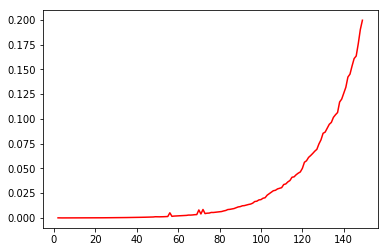

In [55]:
plt.figure()
#plt.plot(ns, t_s1, 'b-', label='first solution')
plt.plot(ns, t_s1, 'r-', label='second solution')
